In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_pos = '../Data/twitter-datasets/train_pos_full.txt'
train_neg = '../Data/twitter-datasets/train_neg_full.txt'

In [3]:
def get_number_of_posts(file_path):
    """
    Returns number of tweets the dataset contains.
    """
    with open(file_path, 'r') as file:
        num_posts = sum(1 for line in file)
    return num_posts

In [4]:
num_pos = get_number_of_posts(train_pos)
num_neg = get_number_of_posts(train_neg)
print(num_pos)
print(num_neg)

1250000
1250000


In [5]:
def plot_lengths(file_path):
    """
    Generates a plot that shows the distribution of number of words per tweet.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()
    line_lengths = [len(line.split()) for line in lines]
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(line_lengths) + 1), line_lengths)
    plt.title('Number of Words per Post')
    plt.xlabel('Post Number')
    plt.ylabel('Number of Words')
    plt.show()

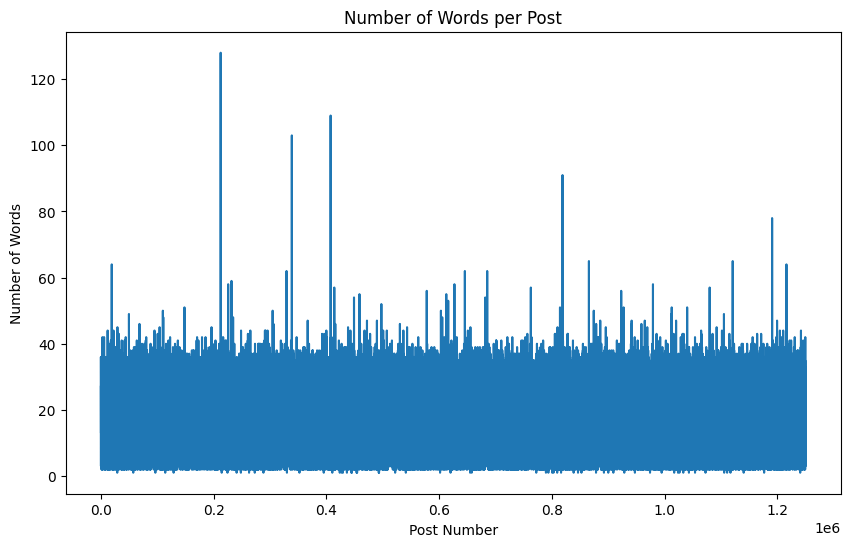

In [6]:
plot_lengths(train_pos)

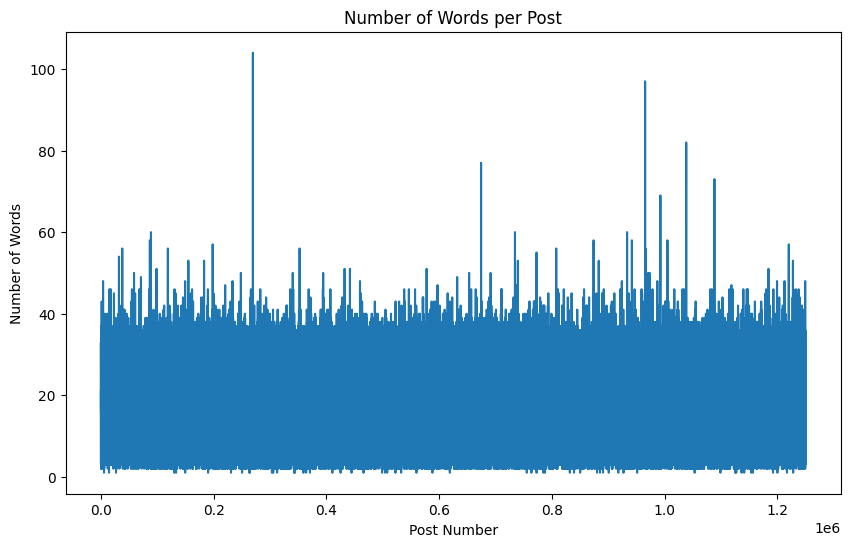

In [7]:
plot_lengths(train_neg)

In [8]:
def plot_lengths_hist(file_path, log_scale=False):
    """
    Generates the histogram of number of words per tweet.
    log_scale indicates whether y-axis will be transformed into log scale or not.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()
    line_lengths = [len(line.split()) for line in lines]
    plt.figure(figsize=(10, 6))
    sns.histplot(line_lengths, bins=20)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    if log_scale:
        plt.yscale('log')
    plt.show()

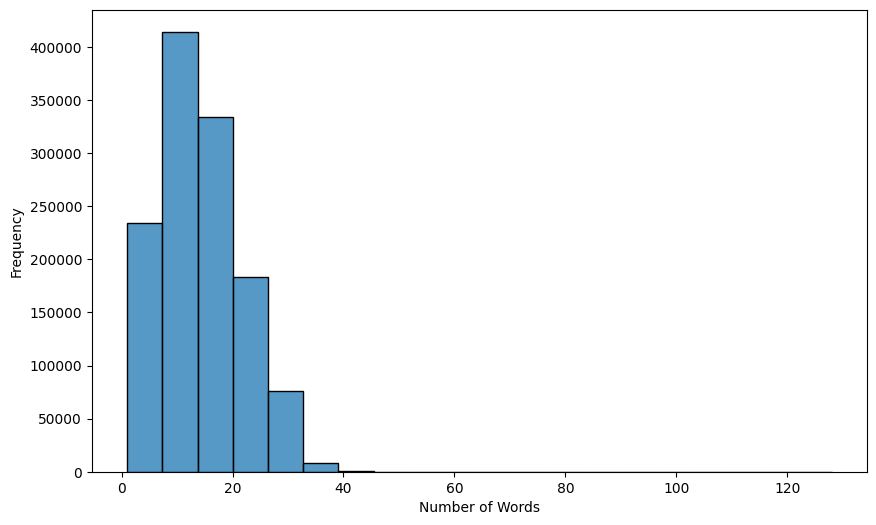

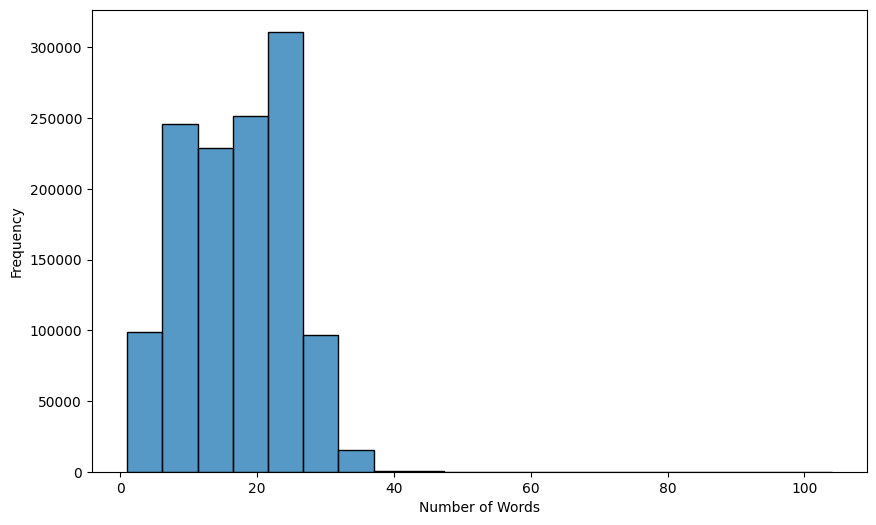

In [9]:
plot_lengths_hist(train_pos)
plot_lengths_hist(train_neg)

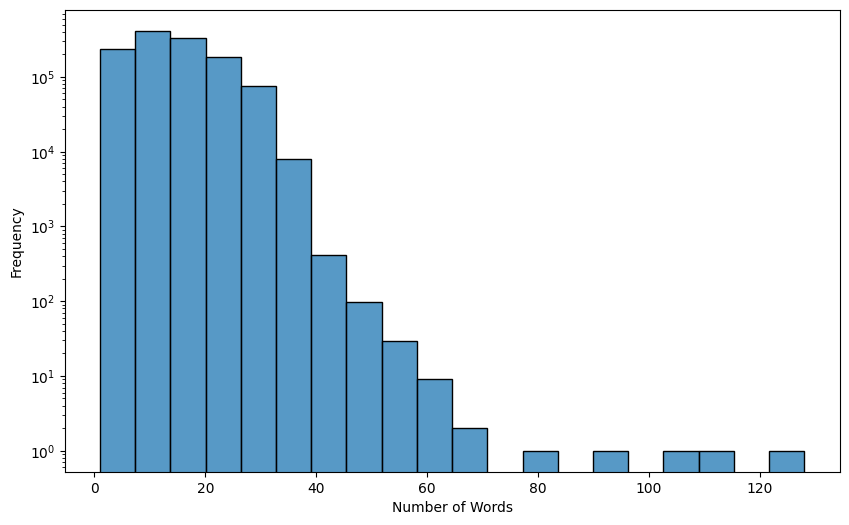

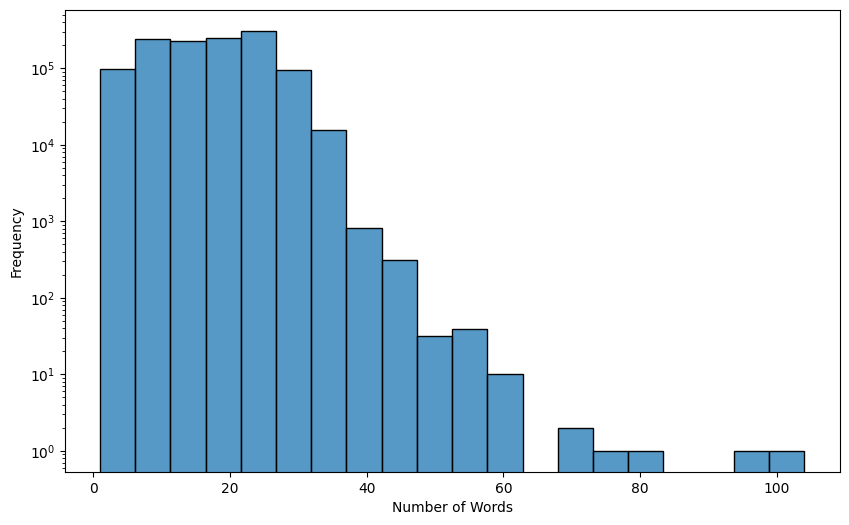

In [10]:
plot_lengths_hist(train_pos, log_scale=True)
plot_lengths_hist(train_neg, log_scale=True)

In [11]:
def remove_duplicates(file_path, output_file_path):
    """
    Removes duplicate tweets within the dataset and returns the output into txt file.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()
    unique_lines = list(dict.fromkeys(lines))
    with open(output_file_path, 'w') as file:
        file.writelines(unique_lines)
    print('Done!')

In [12]:
train_pos_unique = '../Data/twitter-datasets/train_pos_unique.txt'
train_neg_unique = '../Data/twitter-datasets/train_neg_unique.txt'

In [13]:
remove_duplicates(train_pos, train_pos_unique)
remove_duplicates(train_neg, train_neg_unique)

Done!
Done!


In [14]:
num_pos_unique = get_number_of_posts(train_pos_unique)
num_neg_unique = get_number_of_posts(train_neg_unique)
print(num_pos_unique)
print(num_neg_unique)

1127644
1142838


In [15]:
print(num_pos - num_pos_unique)
print(num_neg - num_neg_unique)

122356
107162


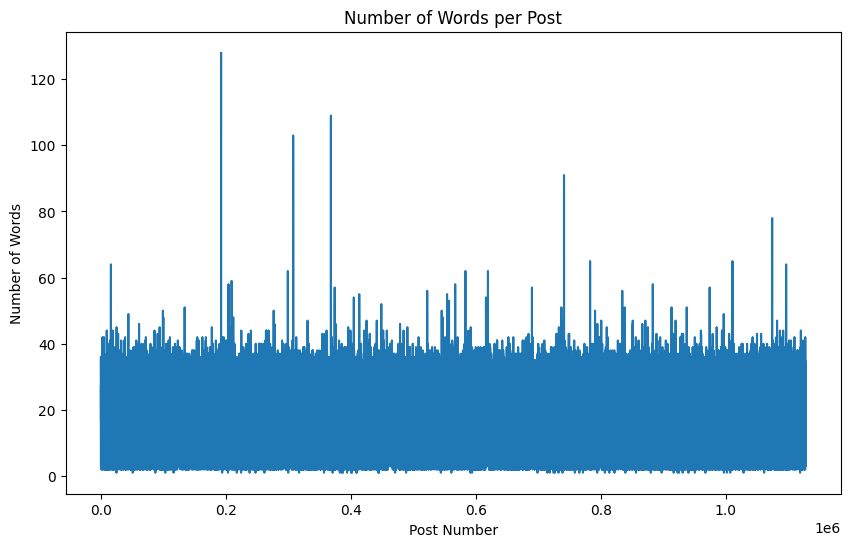

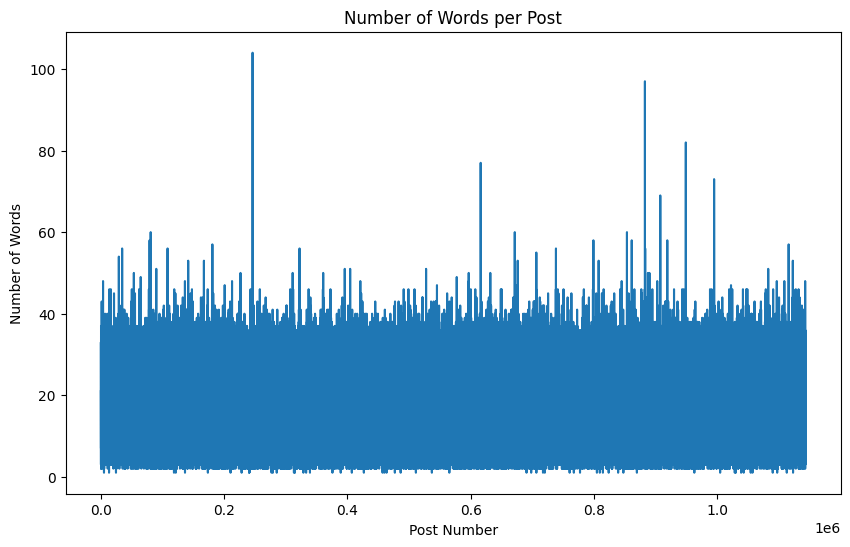

In [16]:
plot_lengths(train_pos_unique)
plot_lengths(train_neg_unique)

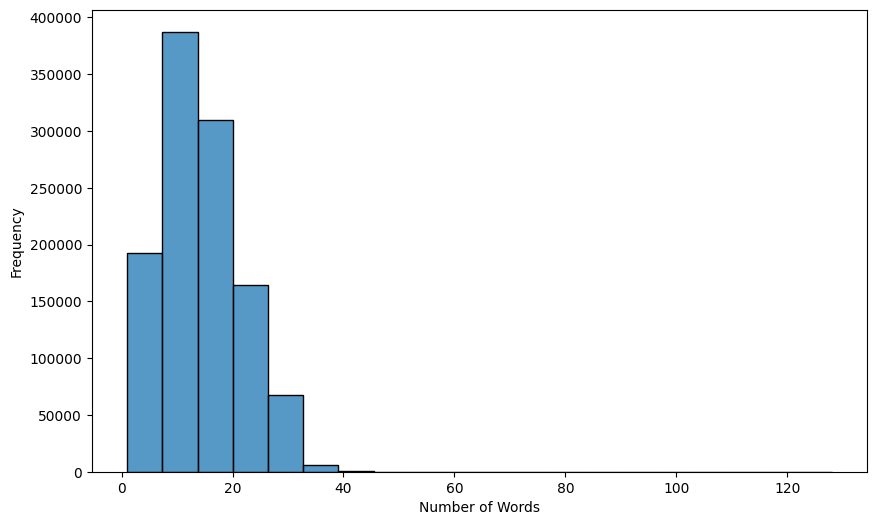

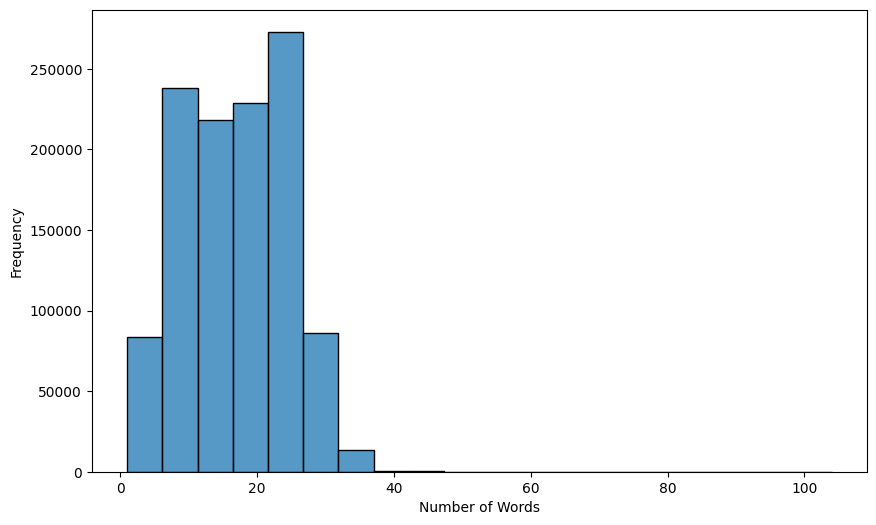

In [17]:
plot_lengths_hist(train_pos_unique)
plot_lengths_hist(train_neg_unique)

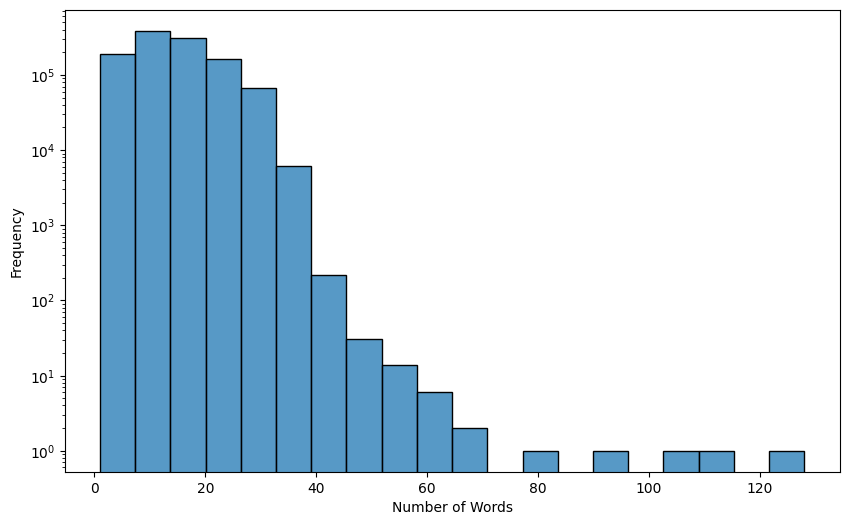

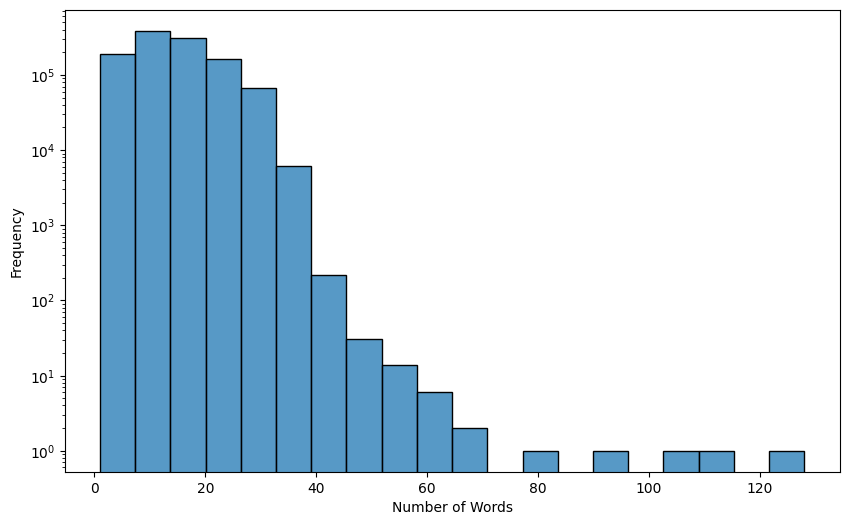

In [18]:
plot_lengths_hist(train_pos_unique, log_scale=True)
plot_lengths_hist(train_pos_unique, log_scale=True)

In [19]:
def compare_files(file1, file2):
    """
    Returns number of duplicates between positive and negative tweets.
    """
    with open(file1, 'r') as f1, open(file2, 'r') as f2:
        file1_lines = set(f1.readlines())
        file2_lines = set(f2.readlines())

    common_lines = file1_lines & file2_lines
    return common_lines

In [20]:
duplicates = compare_files(train_pos, train_neg)
len(duplicates)

1891